In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# 日本語フォントの設定 macOSの場合
plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams['axes.unicode_minus'] = False

# 警告を無視
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# データ作成
# 乱数シードの設定とデータフレームの作成
# 乱数シードとは、同じ乱数を再現可能にするためのものです。
np.random.seed(42) # 何回実行しても同じ乱数が出る
data = { #データの変数、内容をていぐ
    '性別': ['男性']*10 + ['女性']*10, # 男性と女性を10人ずつ
    # np.random.choice()のpパラメータで、各満足度レベルの出現確率を制御している
    '満足度': list(np.random.choice([1,2,3,4,5], 10, p=[0.1,0.3,0.3,0.2,0.1])) + # random.choiceの1から5から確率pに基づいて10回ランダムに選ぶ
              list(np.random.choice([1,2,3,4,5], 10, p=[0.05,0.1,0.25,0.4,0.2]))# random.choiceの1から5から確率pに基づいて10回ランダムに選ぶ
}
df = pd.DataFrame(data) # pandasのDataFrameに変換

# データの表示
print(df) # 中身確認
print("\nデータの形状:", df.shape) # 改行しながらデータを表示

    性別  満足度
0   男性    2
1   男性    5
2   男性    4
3   男性    3
4   男性    2
5   男性    2
6   男性    1
7   男性    4
8   男性    3
9   男性    4
10  女性    1
11  女性    5
12  女性    5
13  女性    3
14  女性    3
15  女性    3
16  女性    3
17  女性    4
18  女性    4
19  女性    3

データの形状: (20, 2)


In [ ]:
df.describe()
# countはデータの数、
# meanは平均値、
# stdは標準偏差、
# minは最小値、
# 25%、50%、75%は四分位数、
# maxは最大値を示す。

,満足度
count,20.000000
mean,3.200000
std,1.196486
min,1.000000
25%,2.750000
50%,3.000000
75%,4.000000
max,5.000000


In [ ]:
# 満足度の統計情報の表示
print("\n満足度の統計情報:")
# aggとは、指定した統計量を一度に計算するためのメソッド
print(df['満足度'].describe())  


満足度の統計情報:
count    20.000000
mean      3.200000
std       1.196486
min       1.000000
25%       2.750000
50%       3.000000
75%       4.000000
max       5.000000
Name: 満足度, dtype: float64


<Figure size 300x200 with 0 Axes>

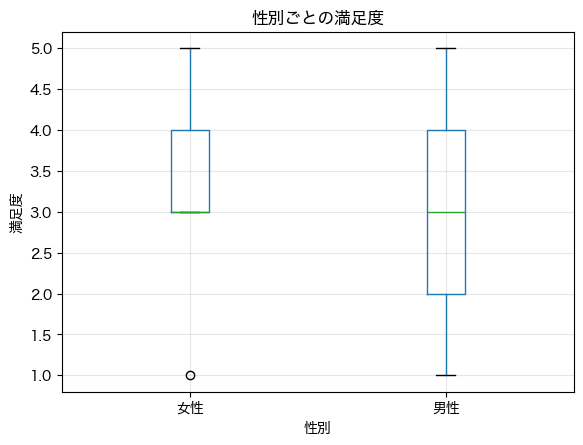

In [ ]:
# データの可視化
plt.figure(figsize=(3, 2))

# 箱ひげ図
df.boxplot(column='満足度', by='性別') # column→縦軸、by→何事に変えるか
plt.title('性別ごとの満足度')
plt.suptitle('')  # デフォルトのタイトルを削除
plt.ylabel('満足度')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
df [df['性別'] == '男性']['満足度']

,性別,満足度
0,男性,2
1,男性,5
2,男性,4
3,男性,3
4,男性,2
5,男性,2
6,男性,1
7,男性,4
8,男性,3
9,男性,4


In [ ]:
# Mann-Whitney U検定
male_scores = df[df['性別']=='男性']['満足度']
female_scores = df[df['性別']=='女性']['満足度']

stat, p_value = stats.mannwhitneyu(male_scores, female_scores, alternative='two-sided')
print(f"Mann-Whitney U検定の結果:")
print(f"U統計量: {stat}")
print(f"p値: {p_value:.4f}")
print(f"\n結果の解釈:")
if p_value < 0.05:
    print("p < 0.05: 男女間で満足度に統計的に有意な差があります。")
else:
    print("p >= 0.05: 男女間で満足度に統計的に有意な差はありません。")

# p値だけレポートに載せるで大丈夫
# サンプル数が多いと有意なさが出やすい

Mann-Whitney U検定の結果:
U統計量: 40.5
p値: 0.4819

結果の解釈:
p >= 0.05: 男女間で満足度に統計的に有意な差はありません。


p値とは得られた結果が偶然によるものである確率を表す

p値の解釈

p < 0.05： 「統計的に有意」と判断します。観測された差や関連が偶然による可能性が低いと考えられます。
p ≥ 0.05：「統計的に有意でない」と判断します。観測された差や関連が偶然によるものである可能性を否定できません。

効果の大きさを示すものdではない
仮説が真である確率ではない

何やるか
統計処理に関すること
何検定に使うのか
p値とは

In [14]:
# ペアデータの作成
np.random.seed(123)
n = 20
pre_scores = np.random.choice([1,2,3,4,5], n, p=[0.2,0.3,0.3,0.15,0.05])
# 授業後は全体的に向上
post_scores = np.clip(pre_scores + np.random.choice([-1,0,1,2], n, p=[0.1,0.2,0.5,0.2]), 1, 5)

# 授業前と授業後の平均、中央値、標準偏差を計算print("授業前の基本統計量:")
print(f"平均: {np.mean(pre_scores):.2f}, 中央値: {np.median(pre_scores):.2f}, 標準偏差: {np.std(pre_scores, ddof=1):.2f}")

print("授業後の基本統計量:")
print(f"平均: {np.mean(post_scores):.2f}, 中央値: {np.median(post_scores):.2f}, 標準偏差: {np.std(post_scores, ddof=1):.2f}")

df_pair = pd.DataFrame({'事前': pre_scores, '事後': post_scores})

# Wilcoxon符号付順位検定
stat, p_value = stats.wilcoxon(df_pair['事前'], df_pair['事後'])
# 検定統計量とは、Wilcoxon検定で計算される値で、事前と事後の差の順位を基にしています。
# この値が大きいほど、事前と事後の差が大きいことを示します。
# p値は、検定統計量に基づいて、事前と事後の満足度に有意な差があるかどうかを示します。
# 学術論文なら検定統計量を記載、ビジネス報告や日常分析なら省略が一般的です。
print(f"検定統計量: {stat}, p値: {p_value:.4f}")


平均: 2.40, 中央値: 2.00, 標準偏差: 0.94
授業後の基本統計量:
平均: 3.30, 中央値: 3.00, 標準偏差: 1.03
検定統計量: 7.5, p値: 0.0005


In [ ]:
# 5項目のアンケートデータ
items = ['使いやすさ', '機能性', 'デザイン', '速度', '総合評価']
pre_data = np.random.choice([1,2,3,4,5], (30, 5))
post_data = np.clip(pre_data + np.random.choice([0,1,2], (30, 5), p=[0.3,0.5,0.2]), 1, 5)

# 項目ごとに検定for i, item in enumerate(items):
    stat, p = stats.wilcoxon(pre_data[:, i], post_data[:, i])
    print(f"{item}: p = {p:.4f}")
